In [1]:
import keras
import quandl
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

/home/chris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [3]:
raw_data = quandl.get('BITFINEX/BTCUSD')

## See the data

In [4]:
raw_data.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


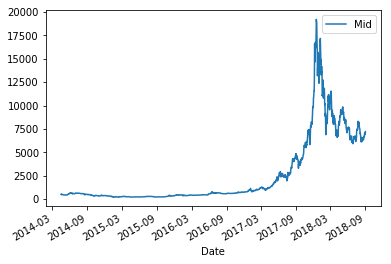

In [5]:
raw_data.drop(['High','Low','Last','Bid','Ask','Volume'],axis=1).plot.line()

## Feat eng

In [6]:
data = raw_data.drop(['High','Low','Last','Bid','Ask'],axis=1)

In [7]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['year'] = data.index.year

In [8]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1568


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


## Le train & Le test
### + feats labels split

In [9]:
train_size = int(len(data) * 0.90)
test_size = len(data) - train_size

In [10]:
label = ['Mid']
feats = [c for c in data.columns if c not in label]

In [11]:
train = data[:train_size]
test = data[train_size:]

In [12]:
len(train), len(test), len(train) + len(test)

(1411, 157, 1568)

In [13]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [14]:
reg = RandomForestRegressor(max_depth=5, random_state=0)

In [15]:
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 7641643.17
Root Mean squared error: 2764.35
R2 score: -6.76


In [18]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]

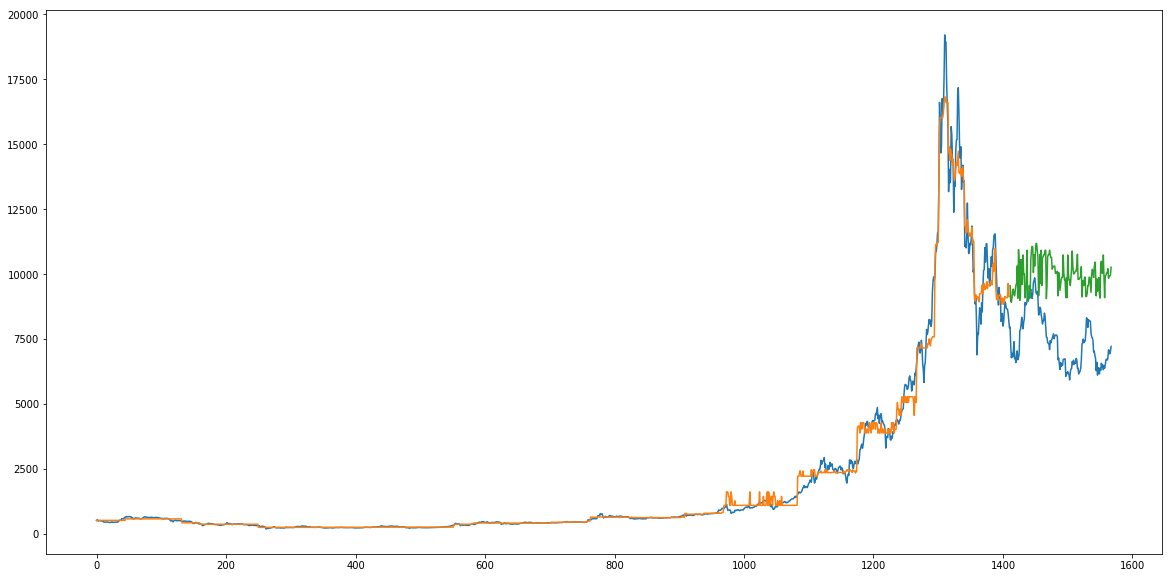

In [20]:
# plot baseline and predictions
plt.plot(raw_data.reset_index().drop(['High','Low','Last','Bid','Ask','Volume','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)

plt.show()

## Shitty...
### Try to remove first years, those were other times

In [21]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1568


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


In [22]:
recent_data = data.iloc[969:]
recent_data.head()

,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2017-01-01,966.995,7147.774423,1,6,1,2017
2017-01-02,998.290,13440.456264,2,0,1,2017
2017-01-03,1019.450,21804.197216,3,1,1,2017
2017-01-04,1038.500,14128.625714,4,2,1,2017
2017-01-05,1138.650,53698.692041,5,3,1,2017


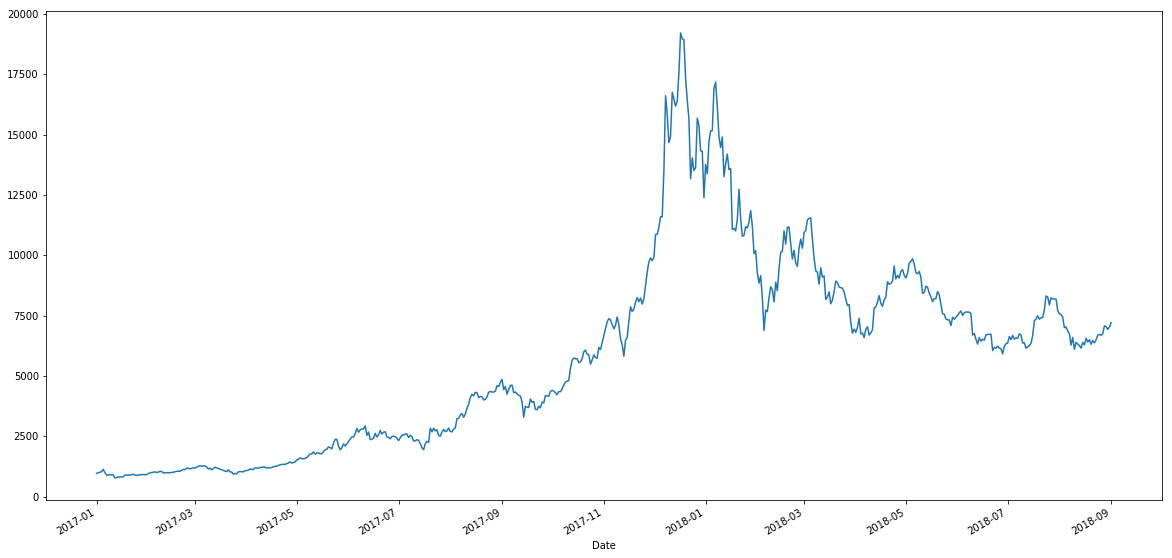

In [23]:
recent_data.Mid.plot.line()

## Much better
### try again

In [24]:
train_size = int(len(recent_data) * 0.90)
test_size = len(recent_data) - train_size
label = ['Mid']
feats = [c for c in recent_data.columns if c not in label]
train = recent_data[:train_size]
test = recent_data[train_size:]
len(train), len(test), len(train) + len(test)

(539, 60, 599)

In [25]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [26]:
reg = RandomForestRegressor(max_depth=5, random_state=0)
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [28]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))
# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 735439.45
Root Mean squared error: 857.58
R2 score: -0.88


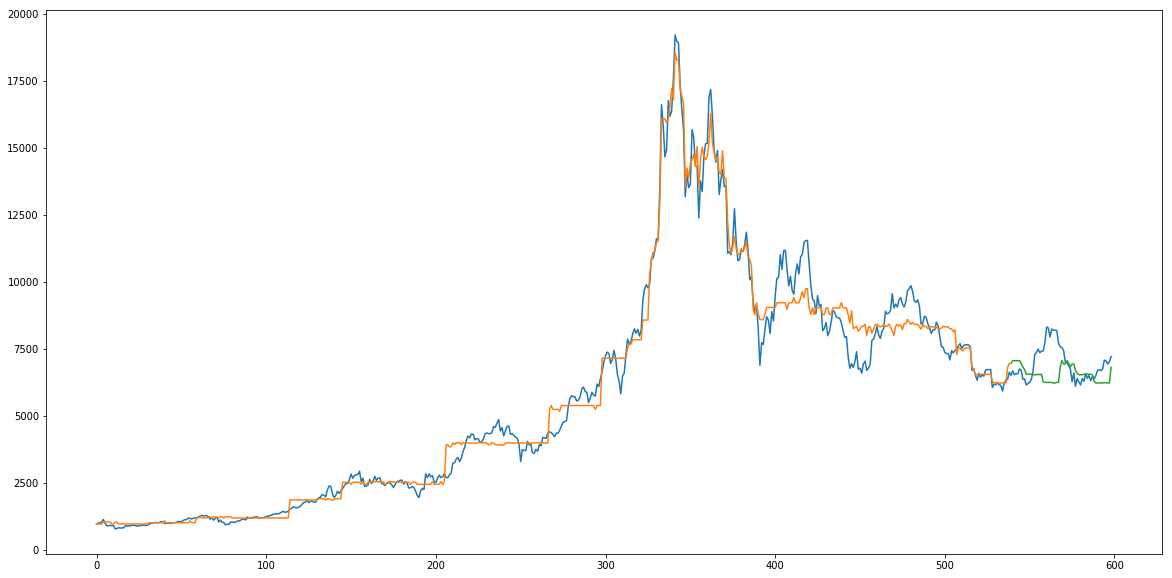

In [29]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)
# plot baseline and predictions
plt.plot(recent_data.reset_index().drop(['Volume','day','dayofweek','month','year','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## Much better <3
### MLP?

In [30]:
mean = recent_data.Volume.mean(axis=0)
std = recent_data.Volume.std(axis=0)

recent_data.Volume = (recent_data.Volume - mean) / std
recent_data.head()

/home/chris/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2017-01-01,966.995,-1.121546,1,6,1,2017
2017-01-02,998.290,-0.890414,2,0,1,2017
2017-01-03,1019.450,-0.583212,3,1,1,2017
2017-01-04,1038.500,-0.865137,4,2,1,2017
2017-01-05,1138.650,0.588282,5,3,1,2017


In [31]:
train_size = int(len(recent_data) * 0.90)
test_size = len(recent_data) - train_size
label = ['Mid']
feats = [c for c in recent_data.columns if c not in label]
train = recent_data[:train_size]
test = recent_data[train_size:]
len(train), len(test), len(train) + len(test)

(539, 60, 599)

In [32]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [87]:
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='nadam')

In [88]:
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1)

Epoch 1/300
539/539 [==============================] - 1s 996us/step - loss: 46652856.6011
Epoch 2/300
539/539 [==============================] - 0s 198us/step - loss: 41443064.4898
Epoch 3/300
539/539 [==============================] - 0s 183us/step - loss: 30722285.4434
Epoch 4/300
539/539 [==============================] - 0s 235us/step - loss: 19736893.6364
Epoch 5/300
539/539 [==============================] - 0s 343us/step - loss: 17728511.8776
Epoch 6/300
539/539 [==============================] - 0s 378us/step - loss: 17744636.3080
Epoch 7/300
539/539 [==============================] - 0s 301us/step - loss: 17687675.3024
Epoch 8/300
539/539 [==============================] - 0s 307us/step - loss: 17748456.8404
Epoch 9/300
539/539 [==============================] - 0s 357us/step - loss: 17717230.7236
Epoch 10/300
539/539 [==============================] - 0s 140us/step - loss: 17712937.8423
Epoch 11/300
539/539 [==============================] - 0s 139us/step - loss: 17709521.80

539/539 [==============================] - 0s 349us/step - loss: 17547703.0835
Epoch 91/300
539/539 [==============================] - 0s 198us/step - loss: 17583198.5937
Epoch 92/300
539/539 [==============================] - 0s 207us/step - loss: 17534745.6735
Epoch 93/300
539/539 [==============================] - 0s 106us/step - loss: 17647548.7978
Epoch 94/300
539/539 [==============================] - 0s 183us/step - loss: 17505439.0167
Epoch 95/300
539/539 [==============================] - 0s 181us/step - loss: 17561285.6382
Epoch 96/300
539/539 [==============================] - 0s 145us/step - loss: 17527753.6364
Epoch 97/300
539/539 [==============================] - 0s 175us/step - loss: 17566212.7718
Epoch 98/300
539/539 [==============================] - 0s 184us/step - loss: 17549390.2653
Epoch 99/300
539/539 [==============================] - 0s 176us/step - loss: 17541846.9814
Epoch 100/300
539/539 [==============================] - 0s 182us/step - loss: 17531505.5937


539/539 [==============================] - 0s 165us/step - loss: 17017108.7013
Epoch 179/300
539/539 [==============================] - 0s 200us/step - loss: 17063157.2746
Epoch 180/300
539/539 [==============================] - 0s 172us/step - loss: 17024688.8312
Epoch 181/300
539/539 [==============================] - 0s 138us/step - loss: 17032821.5622
Epoch 182/300
539/539 [==============================] - 0s 168us/step - loss: 17022464.8460
Epoch 183/300
539/539 [==============================] - 0s 193us/step - loss: 17017597.0148
Epoch 184/300
539/539 [==============================] - 0s 161us/step - loss: 17004498.2115
Epoch 185/300
539/539 [==============================] - 0s 181us/step - loss: 17033973.5028
Epoch 186/300
539/539 [==============================] - 0s 136us/step - loss: 16975074.8794
Epoch 187/300
539/539 [==============================] - 0s 153us/step - loss: 16917001.7440
Epoch 188/300
539/539 [==============================] - 0s 182us/step - loss: 16918

539/539 [==============================] - 0s 176us/step - loss: 14856409.4675
Epoch 267/300
539/539 [==============================] - 0s 191us/step - loss: 14835927.6957
Epoch 268/300
539/539 [==============================] - 0s 150us/step - loss: 14778716.0965
Epoch 269/300
539/539 [==============================] - 0s 151us/step - loss: 14847894.5455
Epoch 270/300
539/539 [==============================] - 0s 138us/step - loss: 14920134.8646
Epoch 271/300
539/539 [==============================] - 0s 145us/step - loss: 14711799.3803
Epoch 272/300
539/539 [==============================] - 0s 157us/step - loss: 14877169.5640
Epoch 273/300
539/539 [==============================] - 0s 147us/step - loss: 14769566.4935
Epoch 274/300
539/539 [==============================] - 0s 169us/step - loss: 14689184.7922
Epoch 275/300
539/539 [==============================] - 0s 164us/step - loss: 14623067.2690
Epoch 276/300
539/539 [==============================] - 0s 182us/step - loss: 14763

In [89]:
# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 14330253.50 MSE (3785.53 RMSE)
Test Score: 2325362.60 MSE (1524.91 RMSE)


In [90]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [91]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

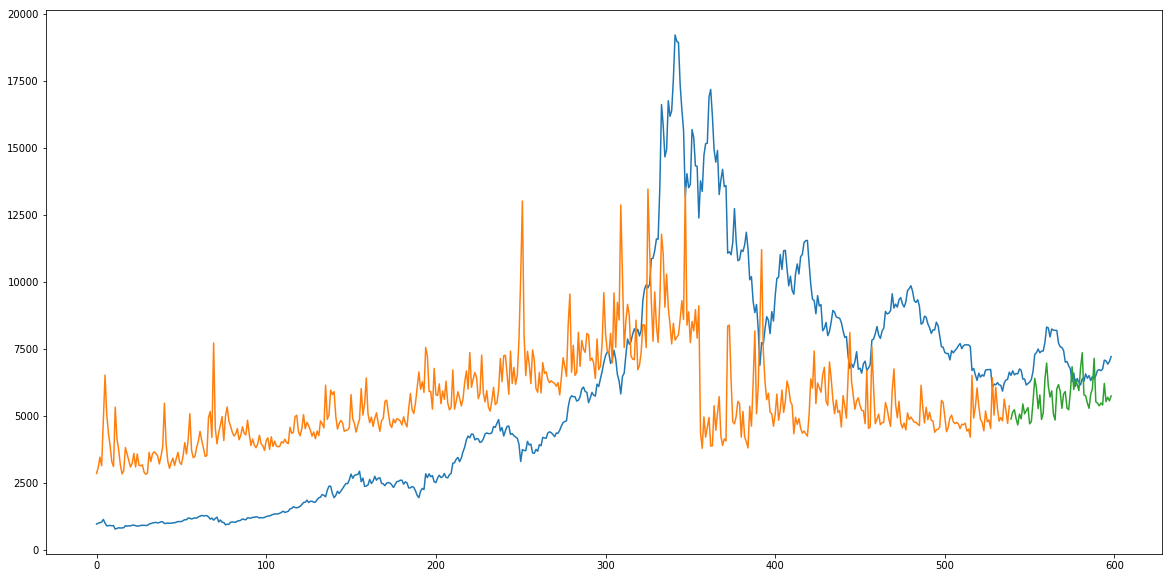

In [92]:
# plot baseline and predictions
plt.plot(recent_data.reset_index().drop(['Volume','day','dayofweek','month','year','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

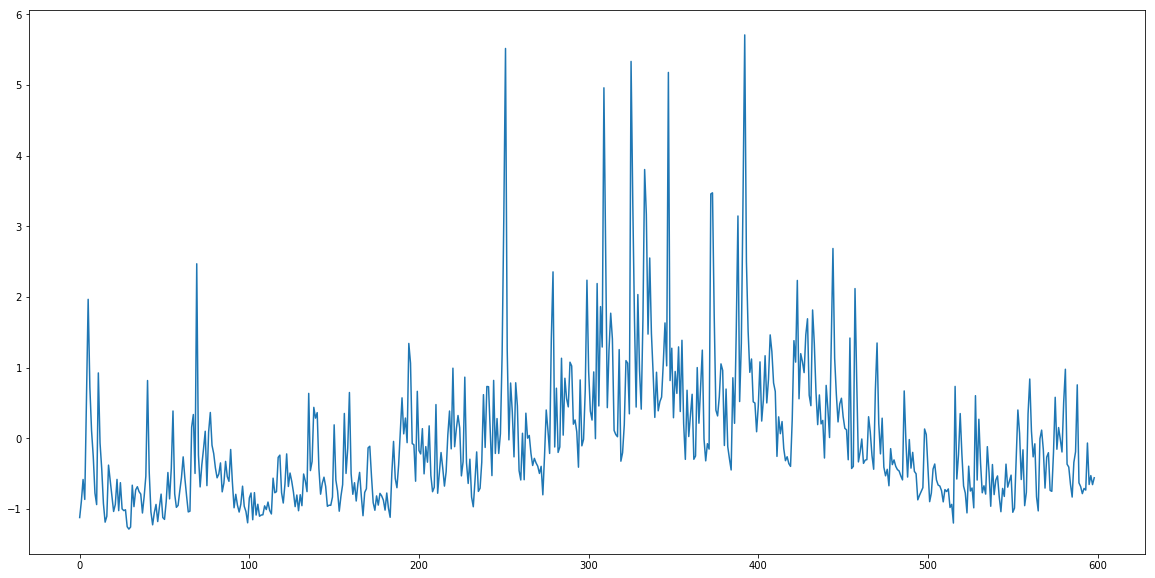

In [58]:
plt.plot(recent_data.reset_index().drop(['Mid','day','dayofweek','month','year','Date'],axis=1))

In [49]:
X_train.head()

,Volume,day,dayofweek,month,year
Date,,,,,
2017-01-01,-1.121546,1,6,1,2017
2017-01-02,-0.890414,2,0,1,2017
2017-01-03,-0.583212,3,1,1,2017
2017-01-04,-0.865137,4,2,1,2017
2017-01-05,0.588282,5,3,1,2017
